## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
from keras.callbacks import ModelCheckpoint

model_ckpt_best = ModelCheckpoint(filepath="./best.h5", 
                             monitor="val_loss", 
                             save_best_only=True,
                             save_weights_only=True)
model_ckpt_notbest = ModelCheckpoint(filepath="./notbest.h5", 
                             monitor="val_loss", 
                             save_best_only=False,
                             save_weights_only=True)

callbacks = [model_ckpt_best, model_ckpt_notbest]
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

'Code Here\n撰寫你的訓練流程並將結果用 dictionary 紀錄\n'

In [8]:
count = 0
for callback in callbacks:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[callback]
         )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    if(count == 0):
        exp_name_tag = 'save_best_only'
        model.load_weights("./best.h5")
        loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
        count = count + 1
    else:
        exp_name_tag = 'not_save_best_only'
        model.load_weights("./notbest.h5")
        loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
    
    loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc,
                             'acc_loadback':acc_loadback,
                             'loss_loadback':loss_loadback}

W0726 18:23:38.337888 25316 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0726 18:23:38.351880 25316 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0726 18:23:38.355877 25316 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0726 18:23:38.428835 25316 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

W0726 18:23:38.792628 25316 deprecation.py:323] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 99us/step - loss: 2.2037 - acc: 0.2722 - val_loss: 2.0512 - val_acc: 0.3270
Epoch 2/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.7475 - acc: 0.3915 - val_loss: 1.8118 - val_acc: 0.3766
Epoch 3/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.6183 - acc: 0.4346 - val_loss: 1.7068 - val_acc: 0.4004
Epoch 4/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.5431 - acc: 0.4613 - val_loss: 1.6354 - val_acc: 0.4294
Epoch 5/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.4850 - acc: 0.4826 - val_loss: 1.6012 - val_acc: 0.4354
Epoch 6/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.4382 - acc: 0.4990 - val_loss: 1.5654 - val_acc: 0.4473
Epoch 7/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.3988 - acc: 0.5136 - val_loss: 1.5720 - val_acc

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 103us/step - loss: 2.2215 - acc: 0.2723 - val_loss: 2.0394 - val_acc: 0.3271
Epoch 2/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.7424 - acc: 0.3927 - val_loss: 1.8102 - val_acc: 0.3802
Epoch 3/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.6209 - acc: 0.4359 - val_loss: 1.7076 - val_acc: 0.4101
Epoch 4/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.5453 - acc: 0.4624 - val_loss: 1.6525 - val_acc: 0.4294
Epoch 5/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.4928 - acc: 0.4789 - val_loss: 1.5967 - val_acc: 0.4418
Epoch 6/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.4463 - acc: 0.4971 - val_loss: 1.5837 - val_acc: 0.4438
Epoch 7/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.4068 - acc: 0.5119 - val_loss: 1.5519 - val_ac

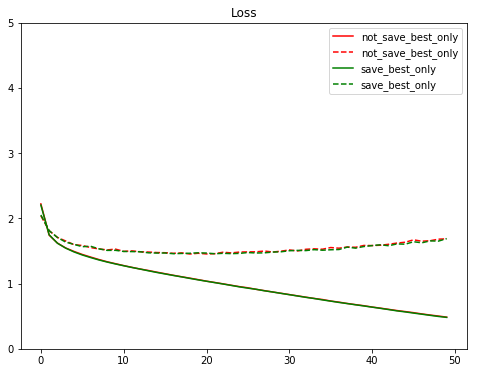

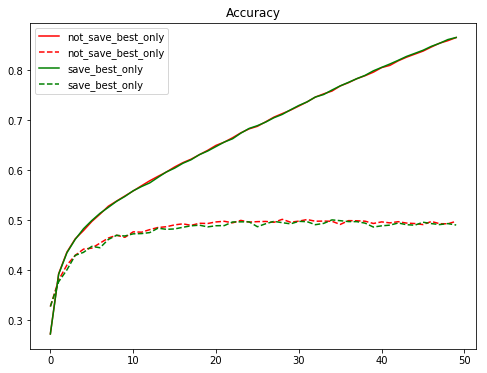

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i%6])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i%6])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i%6])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i%6])
plt.title("Accuracy")
plt.legend()
plt.show()